In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
data = pd.read_csv("../../standardized_datasets/2020-05-27_filtered_countries_julius_complete.csv", index_col=['country', 'date'])
data.drop(columns='cumulative_daily_change_total', inplace=True)
data.head()

confirmed  deaths  recovered  hdi_2018  \
country date                                                 
USA     2020-01-22        1.0     0.0        0.0      0.92   
        2020-01-23        1.0     0.0        0.0      0.92   
        2020-01-24        2.0     0.0        0.0      0.92   
        2020-01-25        2.0     0.0        0.0      0.92   
        2020-01-26        5.0     0.0        0.0      0.92   

                    population_total_2020  population_density_2020  \
country date                                                         
USA     2020-01-22             331002.647                   36.185   
        2020-01-23             331002.647                   36.185   
        2020-01-24             331002.647                   36.185   
        2020-01-25             331002.647                   36.185   
        2020-01-26             331002.647                   36.185   

                    cumulative_total  cumulative_total_per_thousand  retail  \
country date                                                                  
USA     2020-01-22               NaN                            NaN     NaN   
        2020-01-23               NaN                            NaN     NaN   
        2020-01-24               NaN                            NaN     NaN   
        2020-01-25               NaN                            NaN     NaN   
        2020-01-26               NaN                            NaN     NaN   

                    grocery and pharmacy  parks  transit stations  workplaces  \
country date                                                                    
USA     2020-01-22                   NaN    NaN               NaN         NaN   
        2020-01-23                   NaN    NaN               NaN         NaN   
        2020-01-24                   NaN    NaN               NaN         NaN   
        2020-01-25                   NaN    NaN               NaN         NaN   
        2020-01-26                   NaN    NaN               NaN         NaN   

                    residential  driving  transit  walking  pm2.5 value  
country date                                                             
USA     2020-01-22          NaN     3.01     1.06    -2.96          NaN  
        2020-01-23          NaN     7.90     3.29     0.83          NaN  
        2020-01-24          NaN    24.70    13.06    26.67          NaN  
        2020-01-25          NaN    20.92     1.88    39.61          NaN  
        2020-01-26          NaN   -12.68   -18.65   -10.10          NaN

In [2]:
germany = data.loc['Germany'].sort_values(by='date')
pd.set_option('display.max_rows', 500)
germany = germany.loc['2020-02-15':'2020-05-02']
germany.interpolate(inplace=True, limit_area=None)
germany

confirmed  deaths  recovered  hdi_2018  population_total_2020  \
date                                                                        
2020-02-15       16.0     0.0        1.0     0.939              83783.945   
2020-02-16       16.0     0.0        1.0     0.939              83783.945   
2020-02-17       16.0     0.0        1.0     0.939              83783.945   
2020-02-18       16.0     0.0       12.0     0.939              83783.945   
2020-02-19       16.0     0.0       12.0     0.939              83783.945   
2020-02-20       16.0     0.0       12.0     0.939              83783.945   
2020-02-21       16.0     0.0       14.0     0.939              83783.945   
2020-02-22       16.0     0.0       14.0     0.939              83783.945   
2020-02-23       16.0     0.0       14.0     0.939              83783.945   
2020-02-24       16.0     0.0       14.0     0.939              83783.945   
2020-02-25       17.0     0.0       14.0     0.939              83783.945   
2020-02-26       27.0     0.0       15.0     0.939              83783.945   
2020-02-27       46.0     0.0       16.0     0.939              83783.945   
2020-02-28       48.0     0.0       16.0     0.939              83783.945   
2020-02-29       79.0     0.0       16.0     0.939              83783.945   
2020-03-01      130.0     0.0       16.0     0.939              83783.945   
2020-03-02      159.0     0.0       16.0     0.939              83783.945   
2020-03-03      196.0     0.0       16.0     0.939              83783.945   
2020-03-04      262.0     0.0       16.0     0.939              83783.945   
2020-03-05      482.0     0.0       16.0     0.939              83783.945   
2020-03-06      670.0     0.0       17.0     0.939              83783.945   
2020-03-07      799.0     0.0       18.0     0.939              83783.945   
2020-03-08     1040.0     0.0       18.0     0.939              83783.945   
2020-03-09     1176.0     2.0       18.0     0.939              83783.945   
2020-03-10     1457.0     2.0       18.0     0.939              83783.945   
2020-03-11     1908.0     3.0       25.0     0.939              83783.945   
2020-03-12     2078.0     3.0       25.0     0.939              83783.945   
2020-03-13     3675.0     7.0       46.0     0.939              83783.945   
2020-03-14     4585.0     9.0       46.0     0.939              83783.945   
2020-03-15     5795.0    11.0       46.0     0.939              83783.945   
2020-03-16     7272.0    17.0       67.0     0.939              83783.945   
2020-03-17     9257.0    24.0       67.0     0.939              83783.945   
2020-03-18    12327.0    28.0      105.0     0.939              83783.945   
2020-03-19    15320.0    44.0      113.0     0.939              83783.945   
2020-03-20    19848.0    67.0      180.0     0.939              83783.945   
2020-03-21    22213.0    84.0      233.0     0.939              83783.945   
2020-03-22    24873.0    94.0      266.0     0.939              83783.945   
2020-03-23    29056.0   123.0      266.0     0.939              83783.945   
2020-03-24    32986.0   157.0     3243.0     0.939              83783.945   
2020-03-25    37323.0   206.0     3547.0     0.939              83783.945   
2020-03-26    43938.0   267.0     5673.0     0.939              83783.945   
2020-03-27    50871.0   342.0     6658.0     0.939              83783.945   
2020-03-28    57695.0   433.0     8481.0     0.939              83783.945   
2020-03-29    62095.0   533.0     9211.0     0.939              83783.945   
2020-03-30    66885.0   645.0    13500.0     0.939              83783.945   
2020-03-31    71808.0   775.0    16100.0     0.939              83783.945   
2020-04-01    77872.0   920.0    18700.0     0.939              83783.945   
2020-04-02    84794.0  1107.0    22440.0     0.939              83783.945   
2020-04-03    91159.0  1275.0    24575.0     0.939              83783.945   
2020-04-04    96092.0  1444.0    26400.0     0.939              83783.945   
2020-04-

In [3]:
def extrapolate(series):
    first_valid_entries=[0,0]
    i=0
    for entry in series:
        if i==2:
            break
        if np.isnan(entry)==False:
            first_valid_entries[i]=entry
            i=i+1

    gradient = first_valid_entries[1]-first_valid_entries[0]
    index = int(np.flatnonzero(series == first_valid_entries[0]))
    while index>0:
        series.iloc[index-1] = series.iloc[index] - gradient
        index = index - 1

    series[series < 0] = 0


extrapolate(germany.cumulative_total)
extrapolate(germany.cumulative_total_per_thousand)
germany
#germany.info()

confirmed  deaths  recovered  hdi_2018  population_total_2020  \
date                                                                        
2020-02-15       16.0     0.0        1.0     0.939              83783.945   
2020-02-16       16.0     0.0        1.0     0.939              83783.945   
2020-02-17       16.0     0.0        1.0     0.939              83783.945   
2020-02-18       16.0     0.0       12.0     0.939              83783.945   
2020-02-19       16.0     0.0       12.0     0.939              83783.945   
2020-02-20       16.0     0.0       12.0     0.939              83783.945   
2020-02-21       16.0     0.0       14.0     0.939              83783.945   
2020-02-22       16.0     0.0       14.0     0.939              83783.945   
2020-02-23       16.0     0.0       14.0     0.939              83783.945   
2020-02-24       16.0     0.0       14.0     0.939              83783.945   
2020-02-25       17.0     0.0       14.0     0.939              83783.945   
2020-02-26       27.0     0.0       15.0     0.939              83783.945   
2020-02-27       46.0     0.0       16.0     0.939              83783.945   
2020-02-28       48.0     0.0       16.0     0.939              83783.945   
2020-02-29       79.0     0.0       16.0     0.939              83783.945   
2020-03-01      130.0     0.0       16.0     0.939              83783.945   
2020-03-02      159.0     0.0       16.0     0.939              83783.945   
2020-03-03      196.0     0.0       16.0     0.939              83783.945   
2020-03-04      262.0     0.0       16.0     0.939              83783.945   
2020-03-05      482.0     0.0       16.0     0.939              83783.945   
2020-03-06      670.0     0.0       17.0     0.939              83783.945   
2020-03-07      799.0     0.0       18.0     0.939              83783.945   
2020-03-08     1040.0     0.0       18.0     0.939              83783.945   
2020-03-09     1176.0     2.0       18.0     0.939              83783.945   
2020-03-10     1457.0     2.0       18.0     0.939              83783.945   
2020-03-11     1908.0     3.0       25.0     0.939              83783.945   
2020-03-12     2078.0     3.0       25.0     0.939              83783.945   
2020-03-13     3675.0     7.0       46.0     0.939              83783.945   
2020-03-14     4585.0     9.0       46.0     0.939              83783.945   
2020-03-15     5795.0    11.0       46.0     0.939              83783.945   
2020-03-16     7272.0    17.0       67.0     0.939              83783.945   
2020-03-17     9257.0    24.0       67.0     0.939              83783.945   
2020-03-18    12327.0    28.0      105.0     0.939              83783.945   
2020-03-19    15320.0    44.0      113.0     0.939              83783.945   
2020-03-20    19848.0    67.0      180.0     0.939              83783.945   
2020-03-21    22213.0    84.0      233.0     0.939              83783.945   
2020-03-22    24873.0    94.0      266.0     0.939              83783.945   
2020-03-23    29056.0   123.0      266.0     0.939              83783.945   
2020-03-24    32986.0   157.0     3243.0     0.939              83783.945   
2020-03-25    37323.0   206.0     3547.0     0.939              83783.945   
2020-03-26    43938.0   267.0     5673.0     0.939              83783.945   
2020-03-27    50871.0   342.0     6658.0     0.939              83783.945   
2020-03-28    57695.0   433.0     8481.0     0.939              83783.945   
2020-03-29    62095.0   533.0     9211.0     0.939              83783.945   
2020-03-30    66885.0   645.0    13500.0     0.939              83783.945   
2020-03-31    71808.0   775.0    16100.0     0.939              83783.945   
2020-04-01    77872.0   920.0    18700.0     0.939              83783.945   
2020-04-02    84794.0  1107.0    22440.0     0.939              83783.945   
2020-04-03    91159.0  1275.0    24575.0     0.939              83783.945   
2020-04-04    96092.0  1444.0    26400.0     0.939              83783.945   
2020-04-

In [4]:
germany.index = pd.to_datetime(germany.index)
germany = germany.resample('H').interpolate(limit_area=None)
germany

confirmed       deaths  recovered  hdi_2018  \
date                                                                   
2020-02-15 00:00:00      16.000000     0.000000        1.0     0.939   
2020-02-15 01:00:00      16.000000     0.000000        1.0     0.939   
2020-02-15 02:00:00      16.000000     0.000000        1.0     0.939   
2020-02-15 03:00:00      16.000000     0.000000        1.0     0.939   
2020-02-15 04:00:00      16.000000     0.000000        1.0     0.939   
...                            ...          ...        ...       ...   
2020-05-01 20:00:00  164818.666667  6799.333333   128650.0     0.939   
2020-05-01 21:00:00  164855.750000  6802.500000   128737.5     0.939   
2020-05-01 22:00:00  164892.833333  6805.666667   128825.0     0.939   
2020-05-01 23:00:00  164929.916667  6808.833333   128912.5     0.939   
2020-05-02 00:00:00  164967.000000  6812.000000   129000.0     0.939   

                     population_total_2020  population_density_2020  \
date                                                                  
2020-02-15 00:00:00              83783.945                  240.372   
2020-02-15 01:00:00              83783.945                  240.372   
2020-02-15 02:00:00              83783.945                  240.372   
2020-02-15 03:00:00              83783.945                  240.372   
2020-02-15 04:00:00              83783.945                  240.372   
...                                    ...                      ...   
2020-05-01 20:00:00              83783.945                  240.372   
2020-05-01 21:00:00              83783.945                  240.372   
2020-05-01 22:00:00              83783.945                  240.372   
2020-05-01 23:00:00              83783.945                  240.372   
2020-05-02 00:00:00              83783.945                  240.372   

                     cumulative_total  cumulative_total_per_thousand  \
date                                                                   
2020-02-15 00:00:00               0.0                          0.000   
2020-02-15 01:00:00               0.0                          0.000   
2020-02-15 02:00:00               0.0                          0.000   
2020-02-15 03:00:00               0.0                          0.000   
2020-02-15 04:00:00               0.0                          0.000   
...                               ...                            ...   
2020-05-01 20:00:00         2440358.0                         29.127   
2020-05-01 21:00:00         2440358.0                         29.127   
2020-05-01 22:00:00         2440358.0                         29.127   
2020-05-01 23:00:00         2440358.0                         29.127   
2020-05-02 00:00:00         2440358.0                         29.127   

                        retail  grocery and pharmacy      parks  \
date                                                              
2020-02-15 00:00:00   6.000000              1.000000  45.000000   
2020-02-15 01:00:00   6.041667              1.375000  43.500000   
2020-02-15 02:00:00   6.083333              1.750000  42.000000   
2020-02-15 03:00:00   6.125000              2.125000  40.500000   
2020-02-15 04:00:00   6.166667              2.500000  39.000000   
...                        ...                   ...        ...   
2020-05-01 20:00:00 -52.000000            -12.833333 -12.166667   
2020-05-01 21:00:00 -50.500000             -8.875000 -13.625000   
2020-05-01 22:00:00 -49.000000             -4.916667 -15.083333   
2020-05-01 23:00:00 -47.500000             -0.958333 -16.541667   
2020-05-02 00:00:00 -46.000000              3.000000 -18.000000   

                     transit stations  workplaces  residential    driving  \
date                                                                        
2020-02-15 00:00:00         10.000000    0.000000    -1.000000  28.000000   
2020-02-15 01:00:00          9.833333   -0.041667    -0.958333  27.234583   
2020-02-15 02:00:00          9.666667   -0.0833

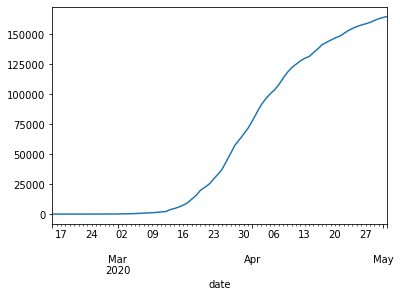

In [5]:
#--First tries with confirmed as univariate time series--
# Taken heavily from tensorflow documentation
uni_data = germany['confirmed']
uni_data.plot()
uni_data = uni_data.values

In [6]:
# Standardization tactic: substraction by mean and dividing by standard deviation

In [7]:
TRAIN_SPLIT = 1500
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [8]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = list(range(-plot_data[0].shape[0], 0))
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt


univariate_past_history = 100
univariate_future_target = 0


In [9]:
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT, univariate_past_history, univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None, univariate_past_history, univariate_future_target)
print(x_train_uni[0])
print(y_train_uni[0])
print(x_train_uni.shape)
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'First try')


[[-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985922]
 [-0.81985

<module 'matplotlib.pyplot' from 'C:\\Users\\nikla\\anaconda3\\envs\\covid-19\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [10]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate_set = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate_set.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate_set = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate_set.batch(BATCH_SIZE).repeat()

simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]), tf.keras.layers.Dense(1)])

simple_lstm_model.compile(optimizer='adam', loss='mae')
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)


(249, 1)


In [11]:
EVALUATION_INTERVAL = 400
EPOCHS = 10

simple_lstm_model.fit(train_univariate, steps_per_epoch=EVALUATION_INTERVAL, epochs=EPOCHS,validation_data=val_univariate, validation_steps=50)


Train for 400 steps, validate for 50 steps
Epoch 1/10
400/400 [==============================] - 32s 80ms/step - loss: 0.0979 - val_loss: 0.1155
Epoch 2/10
400/400 [==============================] - 29s 74ms/step - loss: 0.0033 - val_loss: 0.0802
Epoch 3/10
400/400 [==============================] - 29s 71ms/step - loss: 0.0030 - val_loss: 0.0556
Epoch 4/10
400/400 [==============================] - 30s 74ms/step - loss: 0.0026 - val_loss: 0.0419
Epoch 5/10
400/400 [==============================] - 31s 76ms/step - loss: 0.0027 - val_loss: 0.0323
Epoch 6/10
400/400 [==============================] - 30s 75ms/step - loss: 0.0025 - val_loss: 0.0266
Epoch 7/10
400/400 [==============================] - 35s 87ms/step - loss: 0.0026 - val_loss: 0.0174
Epoch 8/10
400/400 [==============================] - 39s 98ms/step - loss: 0.0024 - val_loss: 0.0115
Epoch 9/10
400/400 [==============================] - 34s 86ms/step - loss: 0.0026 - val_loss: 0.0127
Epoch 10/10
400/400 [==================

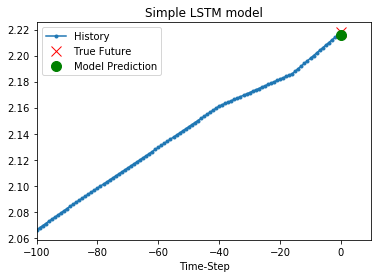

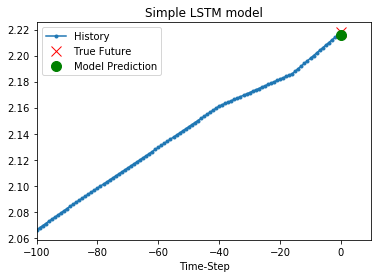

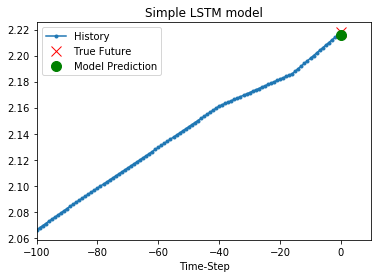

In [12]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()
